## Import Library

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

## Data Loading

In [ ]:
df=pd.read_csv('Data_KIP.csv', sep=';')
df.head()

,classification in mathematics,Nama pengguna,Nama Lengkap Siswa,Nomor Induk Siswa di Sekolah,Nomor Induk Siswa Nasional (NISN),Nomor Pokok Sekolah Nasional (NPSN),Nomor Induk Kependudukan (NIK),No. Telepon/Handphone,No. Whatsapp,Email,Kartu Persyaratan yang dimiliki (Pilih salah satu),Nomor Kartu KIP/PKH/KKS/DTKS/SKTM/Surat dari Panti Asuhan,Jenis Kelamin,Tempat Lahir,Tanggal/Bulan/Tahun Lahir,Agama,Alamat,Provinsi,Kabupaten/Kota,Nama gadis Ibu,Nomor Pendaftaran di Website KIP Kuliah (Contoh : 1121.203.34566.1456.786),Nomor Pendaftaran di Aplikasi PMB UBSI (Contoh : 202102000333),Pilihan Program Studi,Gelombang Pendaftaran PMB,"Tahun lulus (4 digit, contoh: 2019)",Nama Sekolah Asal (SMK/SMA/MA),Provinsi_1,Kabupaten/Kota_2,Kode Pos,Jurusan (Sekolah),Ranking Semester 4,Nilai Rata-rata Semester 4 (Nilai Pengetahuan),Ranking Semester 5,Nilai Rata-rata Semester 5 (Nilai Pengetahuan),Ranking Semester 6,Nilai Rata-rata Semester 6 (Nilai Pengetahuan),Nama Ayah,Status Ayah,Status Hubungan,Pendidikan Ayah,...,Sumber Listrik,Daya Listrik (KWh),Luas Tanah (M2),NJOP per Meter (Rupiah),Luas Bangunan (M2),Bahan Atap,Bahan Lantai,Bahan Tembok,Mandi/Cuci/Kakus,Sumber Air Utama,Jarak Dari Pusat Kota (KM),Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua,Penghasilan Ayah (Rupiah),Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja),Hutang Kepada Pihak Lain (Rupiah),Cicilan Hutang Per Bulan (Rupiah),Total Piutang Kepada Pihak Lain (Rupiah),Cicilan Piutang Dari Pihak Lain (Rupiah),Tabungan Keluarga (Rupiah),Rencana Tinggal,Dukungan Keluarga,Transportasi Asal,Transportasi Harian,Biaya Transportasi (Rupiah),Kartu Peserta KIP Kuliah,Bukti Pendaftaran PMB UBSI,Scan KTP,Scan Kartu Keluarga (KK),Scan Kartu KIP/PKH/KKS/DTKS/SKTM/Surat dari Panti Asuhan/SKTM dari Lingkungan Tempat Tinggal,Scan Ijazah/Surat Keterangan Lulus (Depan dan Belakang),Scan Rapot Semester 4,Scan Rapot Semester 5,Scan Rapot Semester 6,Foto Pribadi/Pas Foto (Pose Formal dengan Background Merah/Biru),Foto Keluarga,Foto Rumah Tampak Depan,Foto Ruang Tamu,Keseluruhan Berkas,PERNYATAAN,Unnamed: 91
0,2021/04/23 1:32:20 AM GMT+7,widihartop@gmail.com,PRASETYO WIDIHARTO,"1,31E+17",3022524558,20277093,"3,28E+15",89626080733,89626980733,widihartop@gmail.com,Kartu Indonesia Pintar (KIP) yang dimiliki saa...,"3,28E+13",Laki-laki,BEKASI,26/06/2002,Islam,Taman Wisma Asri 1 Jl.menteng blok C.19 No.18 ...,JAWA BARAT,KOTA BEKASI,SRI MULYANTI,1.121.202.770.931.640.000,"2,02E+11",107,NaN,2020,MAN 1 KOTA BEKASI,JAWA BARAT,KOTA BEKASI,17121,IPS,29.0,85.0,28.0,85.0,28.0,85.0,JUNAIDI,Masih Hidup,Ayah Tiri,SD,...,PLN,900,60,290,60,Genteng,Ubin,Semen,Milik Sendiri Di Dalam,Sumur,47,4,1000000,0,1.0,0.0,0.0,0.0,0.0,Bersama Keluarga,Ya,Lain-lain,Sepeda Motor,10000.0,https://drive.google.com/u/0/open?usp=forms_we...,NaN,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,https://drive.google.com/u/0/open?usp=forms_we...,Saya Setuju,1.0
1,2021/04/29 1:17:09 PM GMT+7,andhikatuluspangestu@gmail.com,Andika Tulus Pangestu,189010,33732460,20325279,"3,33E+15",88802849244,88802849244,andhikatuluspangestu@gmail.com,Kartu Indonesia Pintar (KIP) yang dimiliki saa...,R7KR4N,Perempuan,Tegal,01/05/2003,Islam,"Jl. Halmahera RT3/RW3 Kudaile, Kecamatan Slawi",Jawa Tengah,Kabupaten Tegal,YULI ASTUTI,1.121.203.252.791.660.000,"2,02E+13",279,NaN,2021,SMA Negeri 3 Slawi,Jawa Tengah,Tegal,52413,IPS,28.0,835.0,32.0,857.0,0.0,0.0,RUNTARIS,Masih Hidup,Ayah Kandung,SD,...,PLN,900,268,285000,40,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 92 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   classification in mathematics                                                                 446 non-null    object 
 1   Nama pengguna                                                                                 446 non-null    object 
 2   Nama Lengkap Siswa                                                                            446 non-null    object 
 3   Nomor Induk Siswa di Sekolah                                                                  446 non-null    object 
 4   Nomor Induk Siswa Nasional (NISN)                                                             446 non-null    object 
 5   Nomor Pokok Sekolah Nasional 

In [ ]:
df.columns

Index(['classification in mathematics', 'Nama pengguna', 'Nama Lengkap Siswa',
       'Nomor Induk Siswa di Sekolah', 'Nomor Induk Siswa Nasional (NISN)',
       'Nomor Pokok Sekolah Nasional (NPSN)', 'Nomor Induk Kependudukan (NIK)',
       'No. Telepon/Handphone', 'No. Whatsapp', 'Email',
       'Kartu Persyaratan yang dimiliki (Pilih salah satu)',
       'Nomor Kartu KIP/PKH/KKS/DTKS/SKTM/Surat dari Panti Asuhan',
       'Jenis Kelamin', 'Tempat Lahir', 'Tanggal/Bulan/Tahun Lahir', 'Agama',
       'Alamat', 'Provinsi', 'Kabupaten/Kota', 'Nama gadis Ibu',
       'Nomor Pendaftaran di Website KIP Kuliah (Contoh : 1121.203.34566.1456.786)',
       'Nomor Pendaftaran di Aplikasi PMB UBSI (Contoh : 202102000333)',
       'Pilihan Program Studi', 'Gelombang Pendaftaran PMB',
       'Tahun lulus (4 digit, contoh: 2019)', 'Nama Sekolah Asal (SMK/SMA/MA)',
       'Provinsi_1', 'Kabupaten/Kota_2', 'Kode Pos', 'Jurusan (Sekolah)',
       'Ranking Semester 4', 'Nilai Rata-rata Semester 4 (Nilai

## Data Cleaning

### Hapus Kolom Yang Tidak Diperlukan

In [ ]:
df=df.drop(columns=['classification in mathematics',
                   'Nama pengguna',
                    'Nomor Induk Siswa di Sekolah', 
                    'Nomor Induk Siswa Nasional (NISN)',
                    'Nomor Pokok Sekolah Nasional (NPSN)', 
                    'Nomor Induk Kependudukan (NIK)',
                    'No. Telepon/Handphone', 'No. Whatsapp', 'Email',
                    'Kartu Persyaratan yang dimiliki (Pilih salah satu)',
                    'Nomor Kartu KIP/PKH/KKS/DTKS/SKTM/Surat dari Panti Asuhan',
                    'Tempat Lahir', 
                    'Tanggal/Bulan/Tahun Lahir', 
                    'Agama',
                    'Alamat', 
                    'Provinsi', 
                    'Kabupaten/Kota', 
                    'Nama gadis Ibu',
                    'Nomor Pendaftaran di Website KIP Kuliah (Contoh : 1121.203.34566.1456.786)',
                    'Nomor Pendaftaran di Aplikasi PMB UBSI (Contoh : 202102000333)',
                    'Pilihan Program Studi', 
                    'Gelombang Pendaftaran PMB',
                    'Tahun lulus (4 digit, contoh: 2019)', 
                    'Nama Sekolah Asal (SMK/SMA/MA)',
                    'Provinsi_1', 
                    'Kabupaten/Kota_2', 
                    'Kode Pos', 
                    'Nama Ayah', 
                    'Status Ayah', 
                    'Status Hubungan', 
                    'Pekerjaan Ayah', 
                    'Detail Ayah',
                    'No. Handphone Ayah',
                    'Nama Ibu', 
                    'Status Ibu', 
                    'Pekerjaan Ibu',
                    'Detail Ibu', 
                    'No. Handphone Ibu', 
                    'Kepemilikan',
                    'Tahun Perolehan (4 digit tahun)', 
                    'Sumber Listrik',
                    'Rencana Tinggal', 
                    'Dukungan Keluarga',
                    'Transportasi Asal', 
                    'Transportasi Harian',
                    'Kartu Peserta KIP Kuliah',
                    'Bukti Pendaftaran PMB UBSI', 
                    'Scan KTP', 
                    'Scan Kartu Keluarga (KK)',
                    'Scan Kartu KIP/PKH/KKS/DTKS/SKTM/Surat dari Panti Asuhan/SKTM dari Lingkungan Tempat Tinggal',
                    'Scan Ijazah/Surat Keterangan Lulus (Depan dan Belakang)',
                    'Scan Rapot Semester 4', 
                    'Scan Rapot Semester 5',
                    'Scan Rapot Semester 6',
                    'Foto Pribadi/Pas Foto (Pose Formal dengan Background Merah/Biru)',
                    'Foto Keluarga', 
                    'Foto Rumah Tampak Depan', 
                    'Foto Ruang Tamu',
                    'Keseluruhan Berkas', 
                    'PERNYATAAN'
                   ], axis=1)

In [ ]:
df.columns

Index(['Nama Lengkap Siswa', 'Jenis Kelamin', 'Jurusan (Sekolah)',
       'Ranking Semester 4', 'Nilai Rata-rata Semester 4 (Nilai Pengetahuan)',
       'Ranking Semester 5', 'Nilai Rata-rata Semester 5 (Nilai Pengetahuan)',
       'Ranking Semester 6', 'Nilai Rata-rata Semester 6 (Nilai Pengetahuan)',
       'Pendidikan Ayah', 'Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu',
       'Pendidikan Ibu', 'Daya Listrik (KWh)', 'Luas Tanah (M2)',
       'NJOP per Meter (Rupiah)', 'Luas Bangunan (M2)', 'Bahan Atap',
       'Bahan Lantai', 'Bahan Tembok', 'Mandi/Cuci/Kakus', 'Sumber Air Utama',
       'Jarak Dari Pusat Kota (KM)',
       'Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua',
       'Penghasilan Ayah (Rupiah)',
       'Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja)',
       'Hutang Kepada Pihak Lain (Rupiah)',
       'Cicilan Hutang Per Bulan (Rupiah)',
       'Total Piutang Kepada Pihak Lain (Rupiah)',
       'Cicilan Piutang Dari Pihak Lain (Rupiah)',
       'Tab

In [ ]:
df.shape

(446, 32)

In [ ]:
df.describe()

,Ranking Semester 4,Nilai Rata-rata Semester 4 (Nilai Pengetahuan),Ranking Semester 5,Nilai Rata-rata Semester 5 (Nilai Pengetahuan),Ranking Semester 6,Nilai Rata-rata Semester 6 (Nilai Pengetahuan),Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu,Daya Listrik (KWh),Luas Tanah (M2),NJOP per Meter (Rupiah),Luas Bangunan (M2),Jarak Dari Pusat Kota (KM),Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua,Penghasilan Ayah (Rupiah),Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja),Hutang Kepada Pihak Lain (Rupiah),Cicilan Hutang Per Bulan (Rupiah),Total Piutang Kepada Pihak Lain (Rupiah),Cicilan Piutang Dari Pihak Lain (Rupiah),Tabungan Keluarga (Rupiah),Biaya Transportasi (Rupiah),Unnamed: 91
count,356.000000,4.080000e+02,350.000000,409.000000,328.000000,391.000000,4.460000e+02,446.000000,446.000000,4.460000e+02,446.000000,446.000000,446.000000,4.460000e+02,4.460000e+02,2.690000e+02,2.970000e+02,2.690000e+02,2.660000e+02,2.780000e+02,4.340000e+02,287.0
mean,7.800562,2.310475e+04,30.620000,3888.655257,31.734756,4222.723785,1.547325e+04,829.762332,225.751121,2.132797e+06,81.840807,47.542601,4.852018,1.274987e+06,2.242178e+10,7.615338e+06,3.942659e+05,1.522409e+06,8.485066e+04,3.951475e+05,1.777461e+05,1.0
std,7.525513,3.736482e+05,431.876649,40850.260609,451.566427,43285.545974,2.431221e+05,504.980148,965.971748,1.549982e+07,272.354741,260.209702,2.427480,1.719459e+06,4.735137e+11,1.696746e+07,8.335798e+05,6.134737e+06,4.845314e+05,1.514306e+06,1.368990e+06,0.0
min,0.000000,7.000000e+00,0.000000,7.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0
25%,2.000000,8.100000e+01,2.000000,82.000000,1.000000,84.000000,2.000000e+00,450.000000,36.000000,2.000000e+02,25.250000,5.000000,4.000000,8.500000e+02,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.425000e+04,1.0
50%,6.000000,8.500000e+01,5.000000,86.000000,5.000000,87.000000,2.000000e+00,900.000000,70.000000,6.400000e+04,50.000000,13.000000,4.000000,1.000000e+06,0.000000e+00,1.000000e+06,2.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+04,1.0
75%,11.000000,8.497500e+02,10.000000,853.000000,10.000000,867.500000,3.000000e+00,900.000000,140.750000,6.000000e+05,70.000000,26.750000,5.000000,2.000000e+06,5.750000e+04,7.000000e+06,5.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+04,1.0
max,32.000000,7.502786e+06,8086.000000,820625.000000,8184.000000,846875.000000,5.000000e+06,4700.000000,15000.000000,2.889360e+08,5000.000000,5000.000000,32.000000,2.750000e+07,1.000000e+13,1.500000e+08,9.000000e+06,5.632680e+07,5.000000e+06,2.000000e+07,1.975000e+07,1.0


In [ ]:
df[df['Nilai Rata-rata Semester 4 (Nilai Pengetahuan)']>=100]

,Nama Lengkap Siswa,Jenis Kelamin,Jurusan (Sekolah),Ranking Semester 4,Nilai Rata-rata Semester 4 (Nilai Pengetahuan),Ranking Semester 5,Nilai Rata-rata Semester 5 (Nilai Pengetahuan),Ranking Semester 6,Nilai Rata-rata Semester 6 (Nilai Pengetahuan),Pendidikan Ayah,Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu,Pendidikan Ibu,Daya Listrik (KWh),Luas Tanah (M2),NJOP per Meter (Rupiah),Luas Bangunan (M2),Bahan Atap,Bahan Lantai,Bahan Tembok,Mandi/Cuci/Kakus,Sumber Air Utama,Jarak Dari Pusat Kota (KM),Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua,Penghasilan Ayah (Rupiah),Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja),Hutang Kepada Pihak Lain (Rupiah),Cicilan Hutang Per Bulan (Rupiah),Total Piutang Kepada Pihak Lain (Rupiah),Cicilan Piutang Dari Pihak Lain (Rupiah),Tabungan Keluarga (Rupiah),Biaya Transportasi (Rupiah),Unnamed: 91
1,Andika Tulus Pangestu,Perempuan,IPS,28.0,835.0,32.0,857.0,0.0,0.0,SD,4,SMP,900,268,285000,40,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,75,6,1000000,0,NaN,NaN,NaN,NaN,NaN,50000.0,NaN
2,NAFATUL ADISTIANINGRUM,Perempuan,Rekayasa Perangkat Lunak,7.0,916.0,10.0,768.0,0.0,0.0,SD,1,SD,900,120,243000,88,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,75,3,2700000,0,5000000.0,500000.0,56326800.0,2346050.0,NaN,50000.0,NaN
3,Erlin meilani,Perempuan,IPS (ilmu pengetahuan sosial),NaN,818.0,NaN,83.0,NaN,NaN,SD,2,SD,450,61,61000,65,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,25,4,1500000,0,NaN,NaN,NaN,NaN,NaN,15000.0,1.0
6,Ruhamaja Aslaba,Laki-laki,Rekayasa Perangkat Lunak,5.0,94235.0,6.0,7708.0,0.0,0.0,SMA/SMK/sederajat,6,SMP,450,118,243000,118,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,15,8,3000000,0,31000000.0,900000.0,0.0,0.0,0.0,120000.0,1.0
7,ANDREAN,Laki-laki,AKUNTANSI,NaN,835.0,NaN,8021.0,NaN,8342.0,SMA/SMK/sederajat,0,SMP,900,400,1516000,42,Asbes,Semen Plaster,Semen,Milik Sendiri Di Dalam,Sumur,8,4,2500000,0,NaN,0.0,0.0,0.0,0.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,Dea Anita,Perempuan,Teknik Pemeliharaan Mekanik Industri,9.0,8020.0,8.0,7854.0,0.0,8062.0,Tidak sekolah,2,Tidak sekolah,450,25,100,25,Asbes,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,11,3,1500000,0,5000000.0,378000.0,0.0,0.0,0.0,10000.0,1.0
433,Latifah Dewi,Perempuan,Otomatisasi dan tata kelola perkantoran,NaN,8436.0,12.0,846.0,NaN,8756.0,SMA/SMK/sederajat,4,SMA/SMK/sederajat,1300,21,6195000,21,Asbes,Keramik,Semen,Milik Sendiri Di Dalam,PDAM,7,6,2500000,0,1.0,0.0,0.0,0.0,0.0,25000.0,1.0
435,FIRA RAHMI,Perempuan,Mipa,1.0,895.0,1.0,8864.0,1.0,8985.0,SD,3,SMA/SMK/sederajat,450,122,10000,70,Seng,Semen Plaster,Semen,Milik Sendiri Di Dalam,Sungai/Mata Air,28,5,1500000,0,NaN,NaN,NaN,NaN,NaN,50000.0,1.0
437,SURTI AYU,Perempuan,IPA,6.0,8642.0,5.0,8664.0,8.0,8842.0,SMA/SMK/sederajat,2,SD,450,3600,10000,36,Seng,Kayu,Semen,Milik Sendiri Di Dalam,Sungai/Mata Air,28,4,1500000,0,NaN,NaN,NaN,NaN,NaN,50000.0,1.0


## Data Preparations

### Standarisasi Kolom Nilai dan Ranking

In [ ]:
def nilai(x):
    if x <= 100:
        return x
    elif (x>100) & (x<1000):
        return x/10
    elif (x>=1000) & (x<10000):
        return x/100
    elif (x>10000):
        return x/1000
    else:
        return 0
    
def ranking(x):
    if x <= 100:
        return x
    elif (x>100) & (x<1000):
        return x/10
    elif (x>=1000) & (x<10000):
        return x/100
    elif (x>10000):
        return x/1000
    else:
        return 0
    
def labeling(x):
    if x == 1:
        return x
    else:
        return 0

df['ranking_sem_4'] = df['Ranking Semester 4'].apply(ranking)
df['nilai_rata2_sem_4'] = df['Nilai Rata-rata Semester 4 (Nilai Pengetahuan)'].apply(nilai)
df['ranking_sem_5'] = df['Ranking Semester 5'].apply(ranking)
df['nilai_rata2_sem_5'] = df['Nilai Rata-rata Semester 5 (Nilai Pengetahuan)'].apply(nilai)
df['ranking_sem_6'] = df['Ranking Semester 6'].apply(nilai)
df['nilai_rata2_sem_6'] = df['Nilai Rata-rata Semester 6 (Nilai Pengetahuan)'].apply(nilai)
df['label']=df['Unnamed: 91'].apply(labeling)

In [ ]:
df.head()

,Nama Lengkap Siswa,Jenis Kelamin,Jurusan (Sekolah),Ranking Semester 4,Nilai Rata-rata Semester 4 (Nilai Pengetahuan),Ranking Semester 5,Nilai Rata-rata Semester 5 (Nilai Pengetahuan),Ranking Semester 6,Nilai Rata-rata Semester 6 (Nilai Pengetahuan),Pendidikan Ayah,Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu,Pendidikan Ibu,Daya Listrik (KWh),Luas Tanah (M2),NJOP per Meter (Rupiah),Luas Bangunan (M2),Bahan Atap,Bahan Lantai,Bahan Tembok,Mandi/Cuci/Kakus,Sumber Air Utama,Jarak Dari Pusat Kota (KM),Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua,Penghasilan Ayah (Rupiah),Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja),Hutang Kepada Pihak Lain (Rupiah),Cicilan Hutang Per Bulan (Rupiah),Total Piutang Kepada Pihak Lain (Rupiah),Cicilan Piutang Dari Pihak Lain (Rupiah),Tabungan Keluarga (Rupiah),Biaya Transportasi (Rupiah),Unnamed: 91,ranking_sem_4,nilai_rata2_sem_4,ranking_sem_5,nilai_rata2_sem_5,ranking_sem_6,nilai_rata2_sem_6,label
0,PRASETYO WIDIHARTO,Laki-laki,IPS,29.0,85.0,28.0,85.0,28.0,85.0,SD,2,SMA/SMK/sederajat,900,60,290,60,Genteng,Ubin,Semen,Milik Sendiri Di Dalam,Sumur,47,4,1000000,0,1.0,0.0,0.0,0.0,0.0,10000.0,1.0,29.0,85.0,28.0,85.0,28.0,85.0,1.0
1,Andika Tulus Pangestu,Perempuan,IPS,28.0,835.0,32.0,857.0,0.0,0.0,SD,4,SMP,900,268,285000,40,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,75,6,1000000,0,NaN,NaN,NaN,NaN,NaN,50000.0,NaN,28.0,83.5,32.0,85.7,0.0,0.0,0.0
2,NAFATUL ADISTIANINGRUM,Perempuan,Rekayasa Perangkat Lunak,7.0,916.0,10.0,768.0,0.0,0.0,SD,1,SD,900,120,243000,88,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,75,3,2700000,0,5000000.0,500000.0,56326800.0,2346050.0,NaN,50000.0,NaN,7.0,91.6,10.0,76.8,0.0,0.0,0.0
3,Erlin meilani,Perempuan,IPS (ilmu pengetahuan sosial),NaN,818.0,NaN,83.0,NaN,NaN,SD,2,SD,450,61,61000,65,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,25,4,1500000,0,NaN,NaN,NaN,NaN,NaN,15000.0,1.0,0.0,81.8,0.0,83.0,0.0,0.0,1.0
4,Fahmi Ramadhan,Laki-laki,IPA,23.0,77.0,21.0,78.0,20.0,81.0,SD,2,SMP,450,50,100000,50,Genteng,Ubin,Semen,Milik Sendiri Di Dalam,Sumur,10,6,0,0,5000000.0,50000.0,0.0,0.0,0.0,30000.0,NaN,23.0,77.0,21.0,78.0,20.0,81.0,0.0


### Menyeragamkan Bentuk Nama Siswa

In [ ]:
df['nama_siswa'] = df['Nama Lengkap Siswa'].str.lower()

In [ ]:
df=df.drop(columns=['Nama Lengkap Siswa',
                    'Ranking Semester 4',
                    'Nilai Rata-rata Semester 4 (Nilai Pengetahuan)',
                    'Ranking Semester 5',
                    'Nilai Rata-rata Semester 5 (Nilai Pengetahuan)',
                    'Ranking Semester 6',
                    'Nilai Rata-rata Semester 6 (Nilai Pengetahuan)',
                    "Unnamed: 91"
                   ], axis=1)

In [ ]:
df.columns

Index(['Jenis Kelamin', 'Jurusan (Sekolah)', 'Pendidikan Ayah',
       'Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu', 'Pendidikan Ibu',
       'Daya Listrik (KWh)', 'Luas Tanah (M2)', 'NJOP per Meter (Rupiah)',
       'Luas Bangunan (M2)', 'Bahan Atap', 'Bahan Lantai', 'Bahan Tembok',
       'Mandi/Cuci/Kakus', 'Sumber Air Utama', 'Jarak Dari Pusat Kota (KM)',
       'Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua',
       'Penghasilan Ayah (Rupiah)',
       'Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja)',
       'Hutang Kepada Pihak Lain (Rupiah)',
       'Cicilan Hutang Per Bulan (Rupiah)',
       'Total Piutang Kepada Pihak Lain (Rupiah)',
       'Cicilan Piutang Dari Pihak Lain (Rupiah)',
       'Tabungan Keluarga (Rupiah)', 'Biaya Transportasi (Rupiah)',
       'ranking_sem_4', 'nilai_rata2_sem_4', 'ranking_sem_5',
       'nilai_rata2_sem_5', 'ranking_sem_6', 'nilai_rata2_sem_6', 'label',
       'nama_siswa'],
      dtype='object')

### Missing Value

In [ ]:
df.isnull().sum()

Jenis Kelamin                                                       0
Jurusan (Sekolah)                                                   0
Pendidikan Ayah                                                     0
Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu                       0
Pendidikan Ibu                                                      0
Daya Listrik (KWh)                                                  0
Luas Tanah (M2)                                                     0
NJOP per Meter (Rupiah)                                             0
Luas Bangunan (M2)                                                  0
Bahan Atap                                                          0
Bahan Lantai                                                        0
Bahan Tembok                                                        0
Mandi/Cuci/Kakus                                                    0
Sumber Air Utama                                                    0
Jarak Dari Pusat Kot

In [ ]:
df=df.fillna(0)
df.head()

,Jenis Kelamin,Jurusan (Sekolah),Pendidikan Ayah,Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu,Pendidikan Ibu,Daya Listrik (KWh),Luas Tanah (M2),NJOP per Meter (Rupiah),Luas Bangunan (M2),Bahan Atap,Bahan Lantai,Bahan Tembok,Mandi/Cuci/Kakus,Sumber Air Utama,Jarak Dari Pusat Kota (KM),Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua,Penghasilan Ayah (Rupiah),Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja),Hutang Kepada Pihak Lain (Rupiah),Cicilan Hutang Per Bulan (Rupiah),Total Piutang Kepada Pihak Lain (Rupiah),Cicilan Piutang Dari Pihak Lain (Rupiah),Tabungan Keluarga (Rupiah),Biaya Transportasi (Rupiah),ranking_sem_4,nilai_rata2_sem_4,ranking_sem_5,nilai_rata2_sem_5,ranking_sem_6,nilai_rata2_sem_6,label,nama_siswa
0,Laki-laki,IPS,SD,2,SMA/SMK/sederajat,900,60,290,60,Genteng,Ubin,Semen,Milik Sendiri Di Dalam,Sumur,47,4,1000000,0,1.0,0.0,0.0,0.0,0.0,10000.0,29.0,85.0,28.0,85.0,28.0,85.0,1.0,prasetyo widiharto
1,Perempuan,IPS,SD,4,SMP,900,268,285000,40,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,75,6,1000000,0,0.0,0.0,0.0,0.0,0.0,50000.0,28.0,83.5,32.0,85.7,0.0,0.0,0.0,andika tulus pangestu
2,Perempuan,Rekayasa Perangkat Lunak,SD,1,SD,900,120,243000,88,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,75,3,2700000,0,5000000.0,500000.0,56326800.0,2346050.0,0.0,50000.0,7.0,91.6,10.0,76.8,0.0,0.0,0.0,nafatul adistianingrum
3,Perempuan,IPS (ilmu pengetahuan sosial),SD,2,SD,450,61,61000,65,Genteng,Keramik,Semen,Milik Sendiri Di Dalam,Sumur,25,4,1500000,0,0.0,0.0,0.0,0.0,0.0,15000.0,0.0,81.8,0.0,83.0,0.0,0.0,1.0,erlin meilani
4,Laki-laki,IPA,SD,2,SMP,450,50,100000,50,Genteng,Ubin,Semen,Milik Sendiri Di Dalam,Sumur,10,6,0,0,5000000.0,50000.0,0.0,0.0,0.0,30000.0,23.0,77.0,21.0,78.0,20.0,81.0,0.0,fahmi ramadhan


In [ ]:
df.columns

Index(['Jenis Kelamin', 'Jurusan (Sekolah)', 'Pendidikan Ayah',
       'Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu', 'Pendidikan Ibu',
       'Daya Listrik (KWh)', 'Luas Tanah (M2)', 'NJOP per Meter (Rupiah)',
       'Luas Bangunan (M2)', 'Bahan Atap', 'Bahan Lantai', 'Bahan Tembok',
       'Mandi/Cuci/Kakus', 'Sumber Air Utama', 'Jarak Dari Pusat Kota (KM)',
       'Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua',
       'Penghasilan Ayah (Rupiah)',
       'Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja)',
       'Hutang Kepada Pihak Lain (Rupiah)',
       'Cicilan Hutang Per Bulan (Rupiah)',
       'Total Piutang Kepada Pihak Lain (Rupiah)',
       'Cicilan Piutang Dari Pihak Lain (Rupiah)',
       'Tabungan Keluarga (Rupiah)', 'Biaya Transportasi (Rupiah)',
       'ranking_sem_4', 'nilai_rata2_sem_4', 'ranking_sem_5',
       'nilai_rata2_sem_5', 'ranking_sem_6', 'nilai_rata2_sem_6', 'label',
       'nama_siswa'],
      dtype='object')

### Standarisasi Nama Kolom

In [ ]:
df=df.rename(columns={"Jenis Kelamin":"jenis_kelamin",
                  "Jurusan (Sekolah)":"jurusan",
                  "Pendidikan Ayah":"pend_ayah",
                  "Pendidikan Ibu":"pend_ibu",
                  "Bahan Atap":"bahan_atap",
                  "Bahan Lantai":"bahan_lantai",
                  "Bahan Tembok":"bahan_tembok",
                  "Mandi/Cuci/Kakus":"mck",
                  "Sumber Air Utama":"sumber_air_utama",
                  "Jumlah Orang Tinggal Di Rumah Termasuk Orang Tua":"jumlah_tanggungan",
                  "Jumlah Tanggungan Tidak Termasuk Ayah dan Ibu":"jumlah_tanggunan_semua",
                  "Luas Bangunan (M2)":"luas_bangunan",
                  "Daya Listrik (KWh)":"daya_listrik", 
                  "Luas Tanah (M2)":"luas_tanah", 
                  "NJOP per Meter (Rupiah)":"njop",
                  "Penghasilan Ayah (Rupiah)":"penghasilan_ayah",
                  "Penghasilan Ibu (Jika Tidak Bekerja Maka Tulis Angka Nol Saja)":"penghasilan_ibu",
                  "Hutang Kepada Pihak Lain (Rupiah)":"hutang_kpd_pihak_lain",
                  "Cicilan Hutang Per Bulan (Rupiah)":"cicilan_hutang_bulanan",
                  "Total Piutang Kepada Pihak Lain (Rupiah)":"total_piutang",
                  "Cicilan Piutang Dari Pihak Lain (Rupiah)":"cicilan_piutang_dr_pihak_lain",
                  "Tabungan Keluarga (Rupiah)":"tabungan", 
                  "Biaya Transportasi (Rupiah)":"biaya_transportasi",
                  "Jarak Dari Pusat Kota (KM)":"jarak_pusat_kota"
                  })

In [ ]:
df=df.drop_duplicates('nama_siswa')

In [ ]:
df.columns

Index(['jenis_kelamin', 'jurusan', 'pend_ayah', 'jumlah_tanggunan_semua',
       'pend_ibu', 'daya_listrik', 'luas_tanah', 'njop', 'luas_bangunan',
       'bahan_atap', 'bahan_lantai', 'bahan_tembok', 'mck', 'sumber_air_utama',
       'jarak_pusat_kota', 'jumlah_tanggungan', 'penghasilan_ayah',
       'penghasilan_ibu', 'hutang_kpd_pihak_lain', 'cicilan_hutang_bulanan',
       'total_piutang', 'cicilan_piutang_dr_pihak_lain', 'tabungan',
       'biaya_transportasi', 'ranking_sem_4', 'nilai_rata2_sem_4',
       'ranking_sem_5', 'nilai_rata2_sem_5', 'ranking_sem_6',
       'nilai_rata2_sem_6', 'label', 'nama_siswa'],
      dtype='object')

In [ ]:
df_prep=df[['nama_siswa','jenis_kelamin', 'jurusan', 'pend_ayah', 'jumlah_tanggunan_semua',
       'pend_ibu', 'daya_listrik', 'luas_tanah', 'njop', 'luas_bangunan',
       'bahan_atap', 'bahan_lantai', 'bahan_tembok', 'mck', 'sumber_air_utama',
       'jarak_pusat_kota', 'jumlah_tanggungan', 'penghasilan_ayah',
       'penghasilan_ibu', 'hutang_kpd_pihak_lain', 'cicilan_hutang_bulanan',
       'total_piutang', 'cicilan_piutang_dr_pihak_lain', 'tabungan',
       'biaya_transportasi', 'ranking_sem_4', 'nilai_rata2_sem_4',
       'ranking_sem_5', 'nilai_rata2_sem_5', 'ranking_sem_6',
       'nilai_rata2_sem_6', 'label']]
df_prep.columns

Index(['nama_siswa', 'jenis_kelamin', 'jurusan', 'pend_ayah',
       'jumlah_tanggunan_semua', 'pend_ibu', 'daya_listrik', 'luas_tanah',
       'njop', 'luas_bangunan', 'bahan_atap', 'bahan_lantai', 'bahan_tembok',
       'mck', 'sumber_air_utama', 'jarak_pusat_kota', 'jumlah_tanggungan',
       'penghasilan_ayah', 'penghasilan_ibu', 'hutang_kpd_pihak_lain',
       'cicilan_hutang_bulanan', 'total_piutang',
       'cicilan_piutang_dr_pihak_lain', 'tabungan', 'biaya_transportasi',
       'ranking_sem_4', 'nilai_rata2_sem_4', 'ranking_sem_5',
       'nilai_rata2_sem_5', 'ranking_sem_6', 'nilai_rata2_sem_6', 'label'],
      dtype='object')

In [ ]:
nama_siswa=df_prep['nama_siswa']

In [ ]:
df_prep['penghasilan_ibu'] = df_prep['penghasilan_ibu'].astype('float')

## EDA

In [ ]:
map_label={1:'diterima', 0:'ditolak'}

In [ ]:
df_prep['label_name']=df_prep['label'].map(map_label)

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

kip_approvement = Counter(df_prep.label).values() 
label = ['Diterima', 'Ditolak']

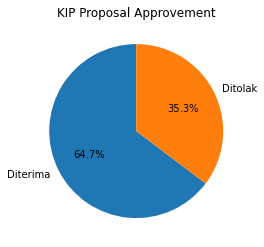

In [ ]:
plt.pie(kip_approvement,
       labels=label,
       autopct='%1.1f%%',
       startangle=90)
plt.title('KIP Proposal Approvement')

plt.show()

In [ ]:
df_prep.columns

Index(['nama_siswa', 'jenis_kelamin', 'jurusan', 'pend_ayah',
       'jumlah_tanggunan_semua', 'pend_ibu', 'daya_listrik', 'luas_tanah',
       'njop', 'luas_bangunan', 'bahan_atap', 'bahan_lantai', 'bahan_tembok',
       'mck', 'sumber_air_utama', 'jarak_pusat_kota', 'jumlah_tanggungan',
       'penghasilan_ayah', 'penghasilan_ibu', 'hutang_kpd_pihak_lain',
       'cicilan_hutang_bulanan', 'total_piutang',
       'cicilan_piutang_dr_pihak_lain', 'tabungan', 'biaya_transportasi',
       'ranking_sem_4', 'nilai_rata2_sem_4', 'ranking_sem_5',
       'nilai_rata2_sem_5', 'ranking_sem_6', 'nilai_rata2_sem_6', 'label',
       'label_name'],
      dtype='object')

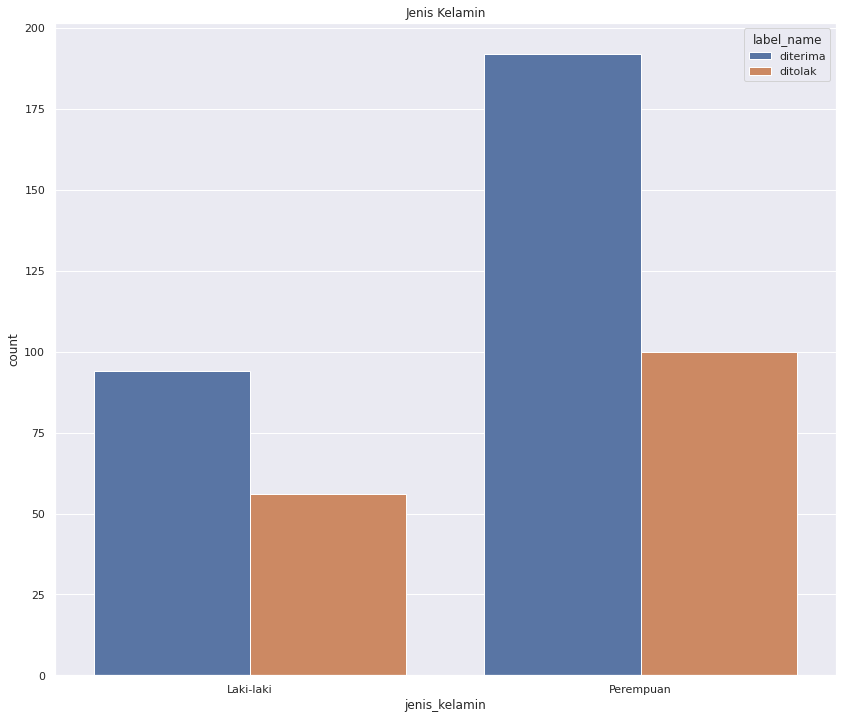

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='jenis_kelamin', hue='label_name')
plt.title("Jenis Kelamin")
plt.show()

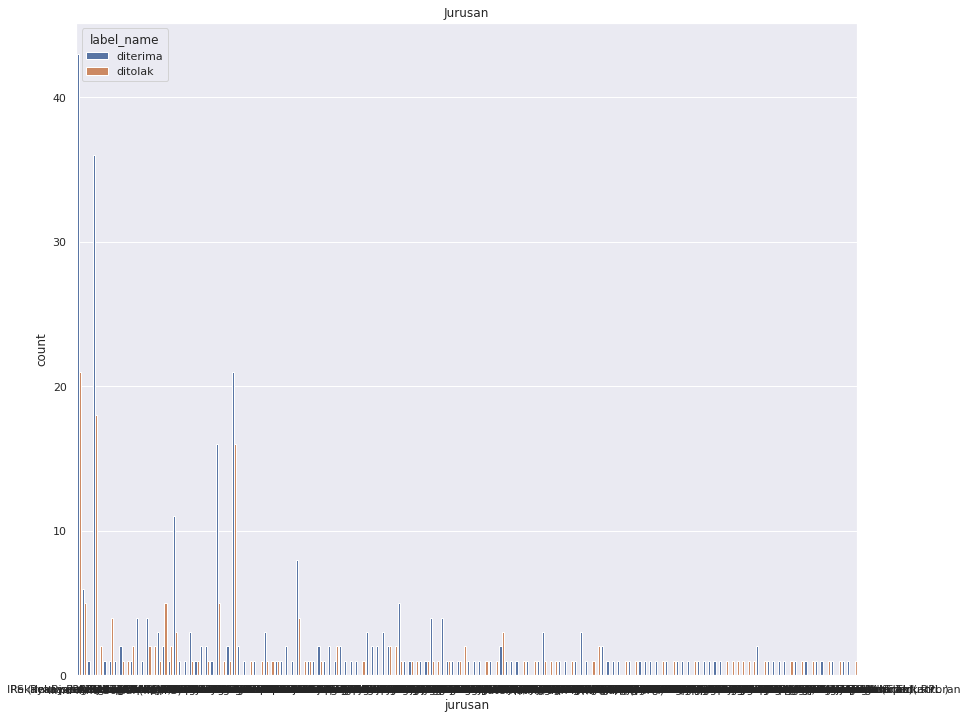

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='jurusan', hue='label_name')
plt.title("Jurusan")
plt.show()

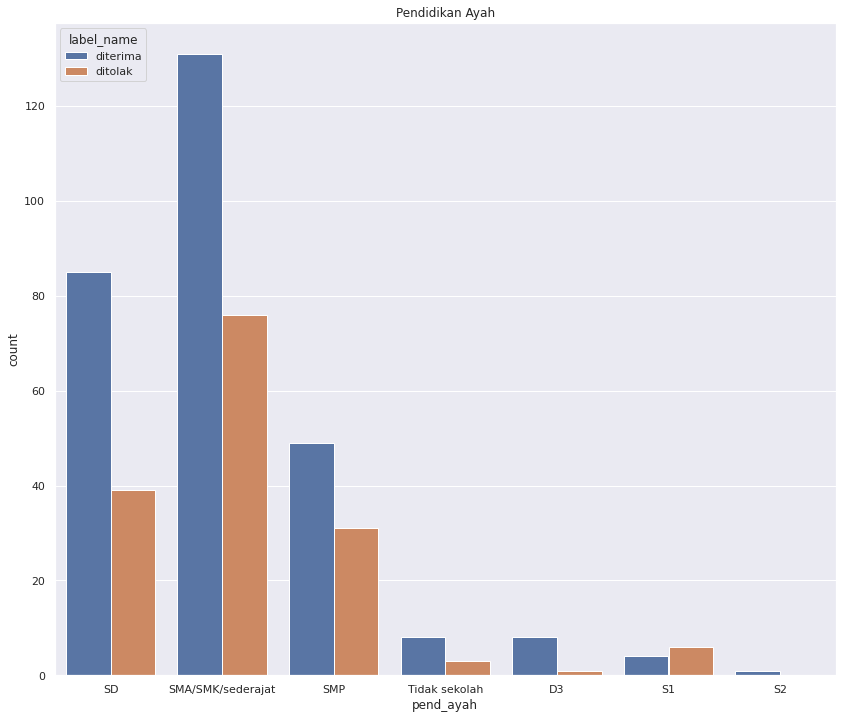

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='pend_ayah', hue='label_name')
plt.title("Pendidikan Ayah")
plt.show()

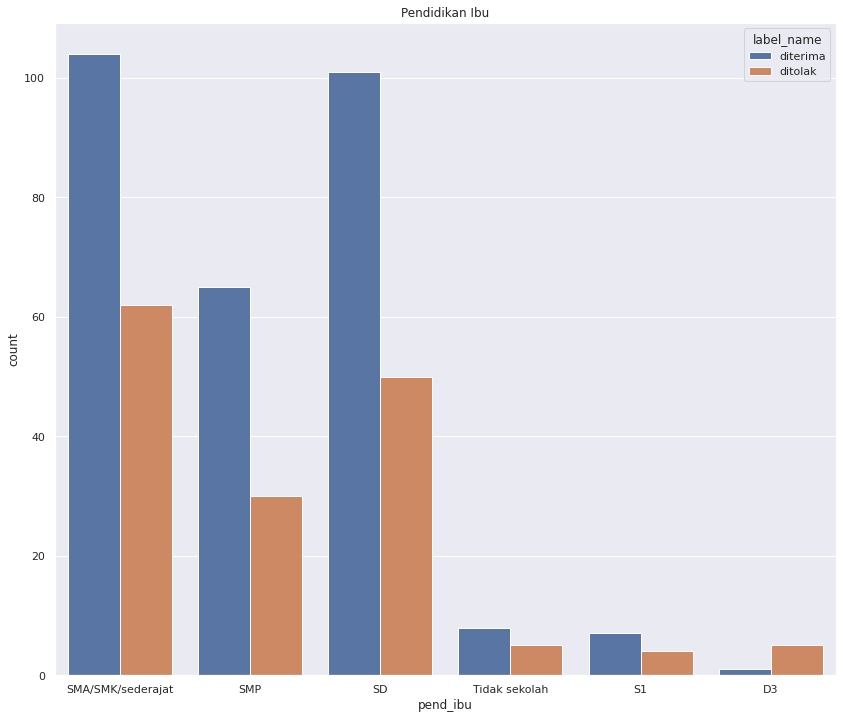

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='pend_ibu', hue='label_name')
plt.title("Pendidikan Ibu")
plt.show()

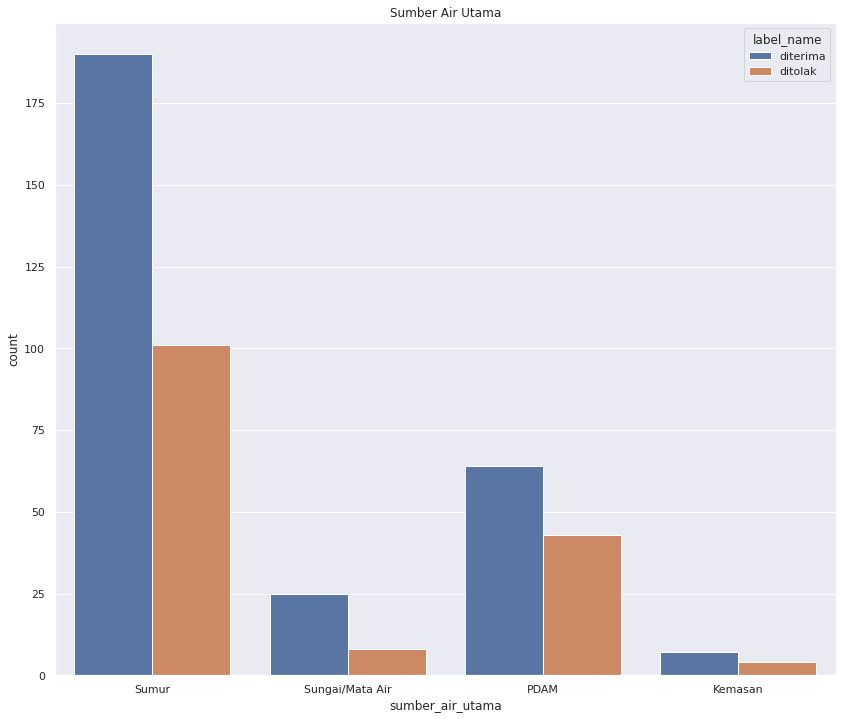

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='sumber_air_utama', hue='label_name')
plt.title("Sumber Air Utama")
plt.show()

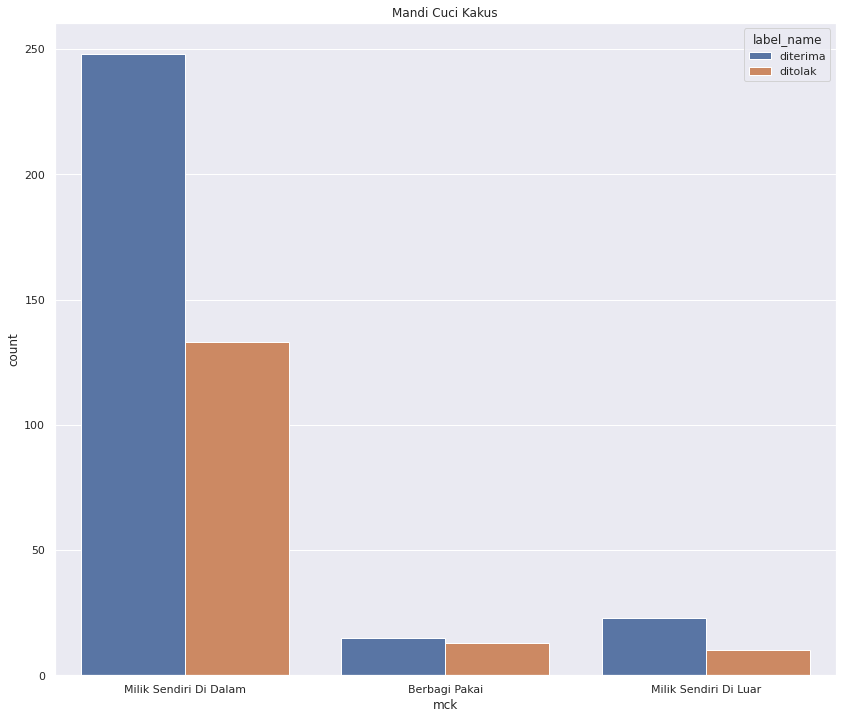

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='mck', hue='label_name')
plt.title("Mandi Cuci Kakus")
plt.show()

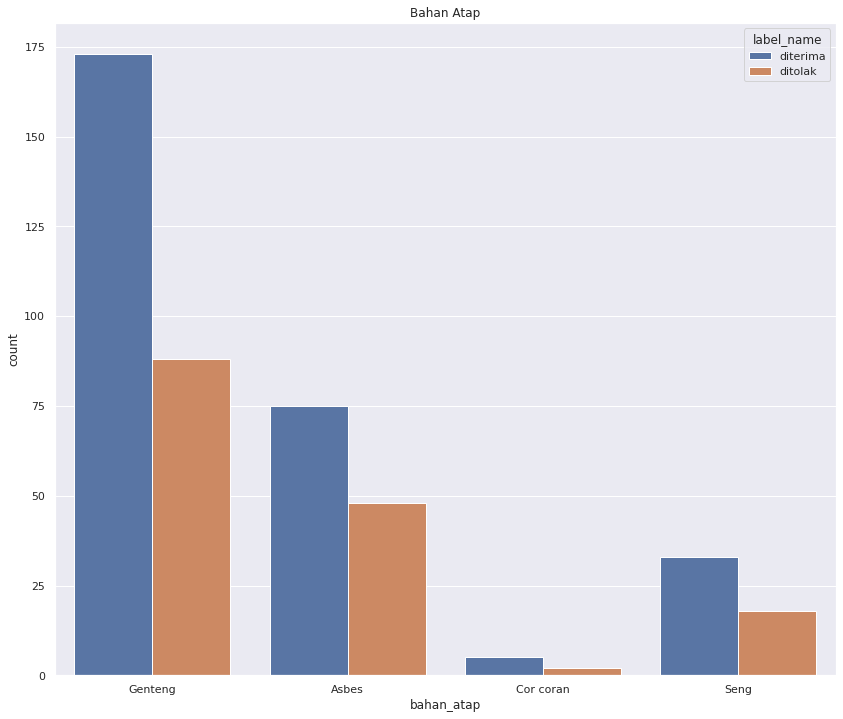

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='bahan_atap', hue='label_name')
plt.title("Bahan Atap")
plt.show()

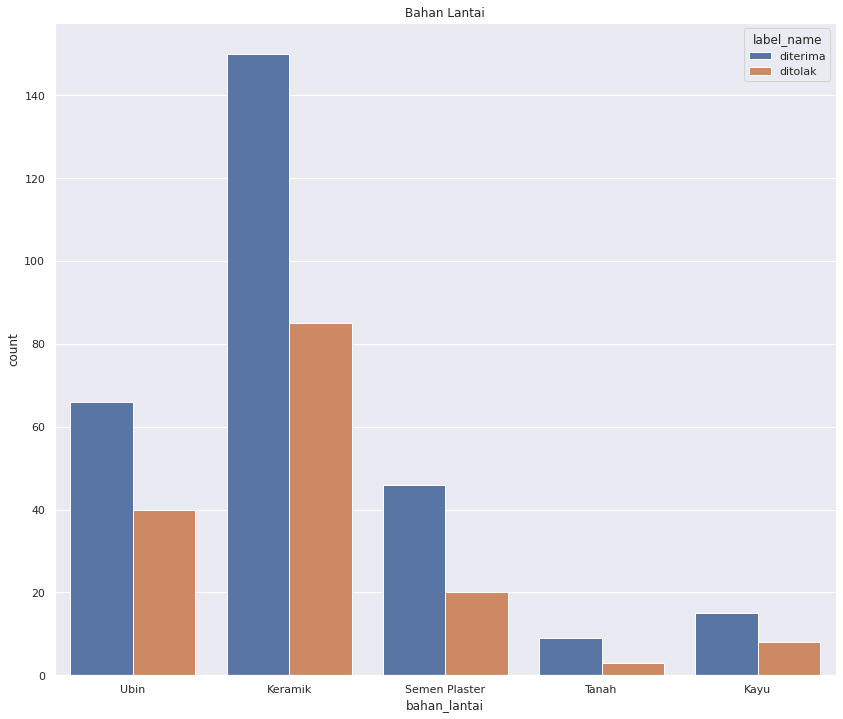

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='bahan_lantai', hue='label_name')
plt.title("Bahan Lantai")
plt.show()

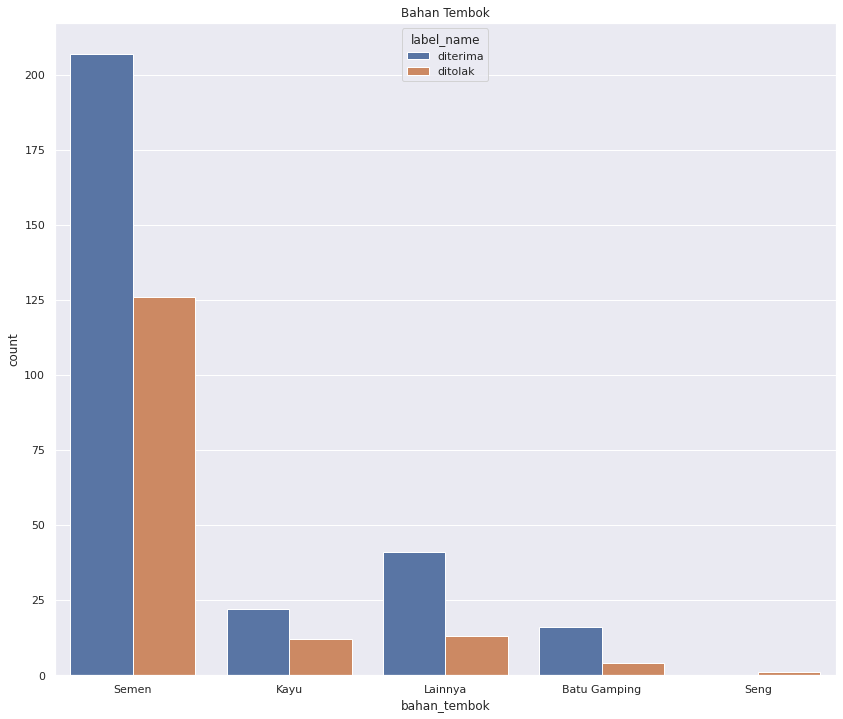

In [ ]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(14, 12))
sns.countplot(data=df_prep, x='bahan_tembok', hue='label_name')
plt.title("Bahan Tembok")
plt.show()

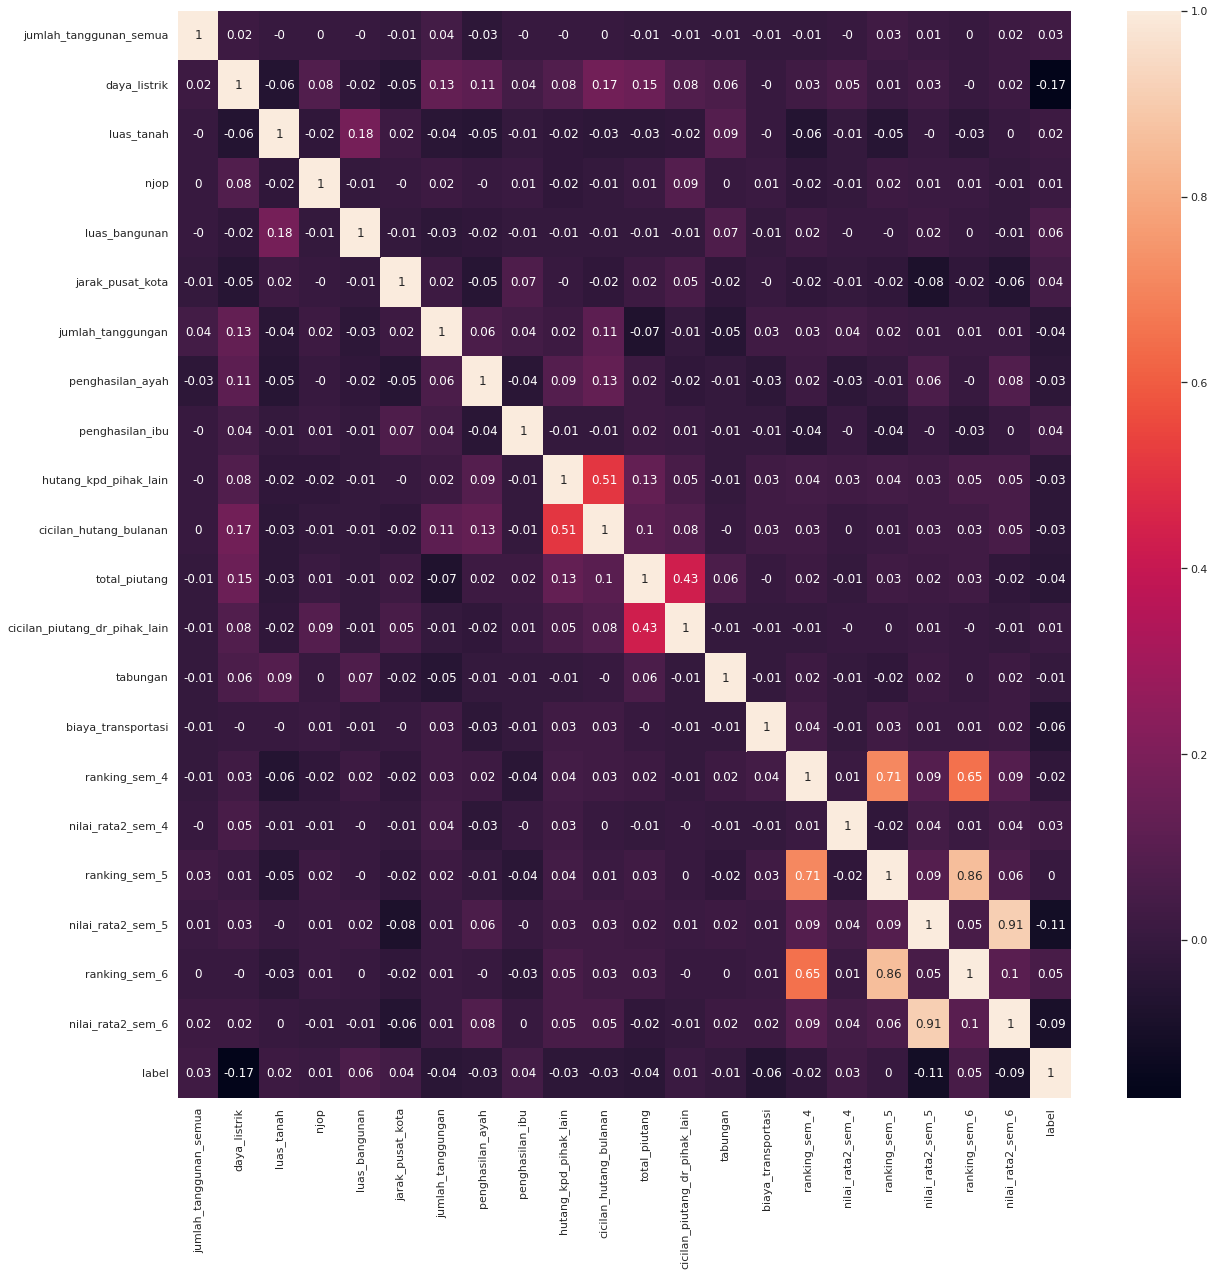

In [ ]:
corrMatrix = round(df_prep.corr(),2)
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrMatrix, annot=True)
plt.show()

### Data Selection

In [ ]:
df_prep.columns

Index(['nama_siswa', 'jenis_kelamin', 'jurusan', 'pend_ayah',
       'jumlah_tanggunan_semua', 'pend_ibu', 'daya_listrik', 'luas_tanah',
       'njop', 'luas_bangunan', 'bahan_atap', 'bahan_lantai', 'bahan_tembok',
       'mck', 'sumber_air_utama', 'jarak_pusat_kota', 'jumlah_tanggungan',
       'penghasilan_ayah', 'penghasilan_ibu', 'hutang_kpd_pihak_lain',
       'cicilan_hutang_bulanan', 'total_piutang',
       'cicilan_piutang_dr_pihak_lain', 'tabungan', 'biaya_transportasi',
       'ranking_sem_4', 'nilai_rata2_sem_4', 'ranking_sem_5',
       'nilai_rata2_sem_5', 'ranking_sem_6', 'nilai_rata2_sem_6', 'label',
       'label_name'],
      dtype='object')

In [ ]:
df_pilih = df_prep[['ranking_sem_4',
                    'nilai_rata2_sem_4',
                    'ranking_sem_5',
                    'nilai_rata2_sem_5',
                    'ranking_sem_6',
                    'nilai_rata2_sem_6',
                    'hutang_kpd_pihak_lain',
                    'cicilan_hutang_bulanan', 
                    'total_piutang',
                    'cicilan_piutang_dr_pihak_lain', 
                    'label'
                    ]]

### Outlier Handling

In [ ]:
from scipy.stats import zscore

z_scores = zscore(df_pilih)
#calculate z-scores of `df`

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_ready = df_pilih[filtered_entries]
df_ready.head()

,ranking_sem_4,nilai_rata2_sem_4,ranking_sem_5,nilai_rata2_sem_5,ranking_sem_6,nilai_rata2_sem_6,hutang_kpd_pihak_lain,cicilan_hutang_bulanan,total_piutang,cicilan_piutang_dr_pihak_lain,label
3,0.0,81.800,0.0,83.00,0.0,0.00,0.0,0.0,0.0,0.0,1.0
4,23.0,77.000,21.0,78.00,20.0,81.00,5000000.0,50000.0,0.0,0.0,0.0
5,20.0,83.000,5.0,91.00,8.0,92.00,0.0,0.0,0.0,0.0,0.0
6,5.0,94.235,6.0,77.08,0.0,0.00,31000000.0,900000.0,0.0,0.0,1.0
7,0.0,83.500,0.0,80.21,0.0,83.42,0.0,0.0,0.0,0.0,1.0


### Data Split

In [ ]:
df_1 = df_ready[df_ready['label']==1]
df_0 = df_ready[df_ready['label']==0]

In [ ]:
df_0

,ranking_sem_4,nilai_rata2_sem_4,ranking_sem_5,nilai_rata2_sem_5,ranking_sem_6,nilai_rata2_sem_6,hutang_kpd_pihak_lain,cicilan_hutang_bulanan,total_piutang,cicilan_piutang_dr_pihak_lain,label
4,23.0,77.00,21.0,78.00,20.0,81.00,5000000.0,50000.0,0.0,0.0,0.0
5,20.0,83.00,5.0,91.00,8.0,92.00,0.0,0.0,0.0,0.0,0.0
8,0.0,81.30,0.0,84.60,0.0,86.70,0.0,0.0,0.0,0.0,0.0
11,6.0,85.13,4.0,86.57,0.0,87.92,1.0,0.0,0.0,0.0,0.0
13,3.0,83.00,3.0,86.00,3.0,87.00,4000000.0,200000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
434,6.0,85.00,18.0,85.00,0.0,86.00,200000.0,0.0,0.0,0.0,0.0
438,0.0,88.00,0.0,88.00,0.0,88.00,0.0,0.0,0.0,0.0,0.0
439,15.0,84.00,10.0,88.00,10.0,88.00,1000000.0,1000000.0,0.0,0.0,0.0
440,7.0,80.17,8.0,82.69,7.0,83.44,3000000.0,100000.0,0.0,0.0,0.0


In [ ]:
df_1_pilih=df_1.iloc[:df_0.shape[0],::]
df_1_pilih

,ranking_sem_4,nilai_rata2_sem_4,ranking_sem_5,nilai_rata2_sem_5,ranking_sem_6,nilai_rata2_sem_6,hutang_kpd_pihak_lain,cicilan_hutang_bulanan,total_piutang,cicilan_piutang_dr_pihak_lain,label
3,0.0,81.800,0.0,83.00,0.0,0.00,0.0,0.0,0.0,0.0,1.0
6,5.0,94.235,6.0,77.08,0.0,0.00,31000000.0,900000.0,0.0,0.0,1.0
7,0.0,83.500,0.0,80.21,0.0,83.42,0.0,0.0,0.0,0.0,1.0
9,6.0,82.000,6.0,83.00,5.0,85.00,0.0,0.0,0.0,0.0,1.0
10,0.0,82.600,0.0,84.30,0.0,84.10,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
235,2.0,90.000,2.0,89.00,1.0,89.00,0.0,0.0,0.0,0.0,1.0
237,0.0,80.000,0.0,80.00,0.0,79.00,0.0,0.0,0.0,0.0,1.0
238,0.0,81.750,0.0,80.00,0.0,83.71,1.0,0.0,0.0,0.0,1.0
240,0.0,81.500,0.0,85.80,0.0,86.80,1.0,0.0,0.0,0.0,1.0


In [ ]:
frames = [df_1_pilih, df_0]

df_ready = pd.concat(frames)
df_ready

,ranking_sem_4,nilai_rata2_sem_4,ranking_sem_5,nilai_rata2_sem_5,ranking_sem_6,nilai_rata2_sem_6,hutang_kpd_pihak_lain,cicilan_hutang_bulanan,total_piutang,cicilan_piutang_dr_pihak_lain,label
3,0.0,81.800,0.0,83.00,0.0,0.00,0.0,0.0,0.0,0.0,1.0
6,5.0,94.235,6.0,77.08,0.0,0.00,31000000.0,900000.0,0.0,0.0,1.0
7,0.0,83.500,0.0,80.21,0.0,83.42,0.0,0.0,0.0,0.0,1.0
9,6.0,82.000,6.0,83.00,5.0,85.00,0.0,0.0,0.0,0.0,1.0
10,0.0,82.600,0.0,84.30,0.0,84.10,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
434,6.0,85.000,18.0,85.00,0.0,86.00,200000.0,0.0,0.0,0.0,0.0
438,0.0,88.000,0.0,88.00,0.0,88.00,0.0,0.0,0.0,0.0,0.0
439,15.0,84.000,10.0,88.00,10.0,88.00,1000000.0,1000000.0,0.0,0.0,0.0
440,7.0,80.170,8.0,82.69,7.0,83.44,3000000.0,100000.0,0.0,0.0,0.0


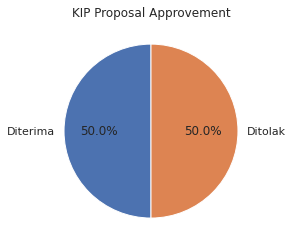

In [ ]:
kip_approvement = Counter(df_ready.label).values() 
label = ['Diterima', 'Ditolak']

plt.pie(kip_approvement,
       labels=label,
       autopct='%1.1f%%',
       startangle=90)
plt.title('KIP Proposal Approvement')

plt.show()

In [ ]:
X = df_ready.drop(columns=['label'])

In [ ]:
y = df_ready['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train = StandardScaler().fit_transform(X_train)

## Modelling

### Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [ ]:
pred = rf.predict(X_test)

In [ ]:
#calculate accuracy, precision and reall
accuracy_rf = accuracy_score(y_test, pred)
precision_rf = precision_score(y_test, pred)
recall_rf = recall_score(y_test, pred)

print('Accuracy: ',accuracy_rf)
print('Precision: ',precision_rf)
print('Recall: ',recall_rf)

Accuracy:  0.45614035087719296
Precision:  0.4791666666666667
Recall:  0.7931034482758621


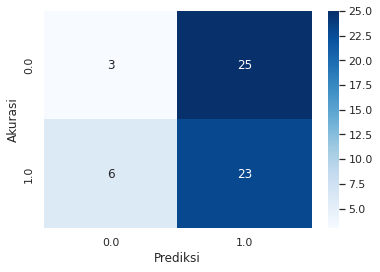

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

### Perceptron

In [ ]:
from sklearn.linear_model import Perceptron
Perc = Perceptron()
Perc.fit(X_train, y_train)
pred = Perc.predict(X_test)

#calculate accuracy, precision and reall
accuracy_p = accuracy_score(y_test, pred)
precision_p = precision_score(y_test, pred)
recall_p = recall_score(y_test, pred)

print('Accuracy: ',accuracy_p)
print('Precision: ',precision_p)
print('Recall: ',recall_p)

Accuracy:  0.5087719298245614
Precision:  0.5094339622641509
Recall:  0.9310344827586207


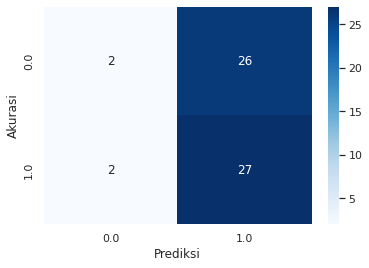

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

### Neural Network

In [ ]:
X.shape[1]

10

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation= 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=1000, batch_size=80)

Epoch 1/1000
3/3 [==============================] - 1s 200ms/step - loss: 0.7081 - accuracy: 0.5022 - val_loss: 66282.6250 - val_accuracy: 0.4561
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.7075 - accuracy: 0.4934 - val_loss: 66622.0781 - val_accuracy: 0.4561
Epoch 3/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.7069 - accuracy: 0.4934 - val_loss: 66950.9766 - val_accuracy: 0.4561
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7064 - accuracy: 0.4978 - val_loss: 67266.6875 - val_accuracy: 0.4737
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7060 - accuracy: 0.5022 - val_loss: 67681.8594 - val_accuracy: 0.4561
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.7054 - accuracy: 0.5066 - val_loss: 67970.5469 - val_accuracy: 0.4561
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.7050 - accuracy: 0.5022 - val_loss: 68294.6406 - val_a

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred_biner = []
for i in pred:
  if i > 0.5:
    pred_biner.append(1)
  else:
    pred_biner.append(0)

In [ ]:
pred = pred_biner

#calculate accuracy, precision and reall
accuracy_nn = accuracy_score(y_test, pred)
precision_nn = precision_score(y_test, pred)
recall_nn = recall_score(y_test, pred)

print('Accuracy: ',accuracy_nn)
print('Precision: ',precision_nn)
print('Recall: ',recall_nn)

Accuracy:  0.47368421052631576
Precision:  0.4883720930232558
Recall:  0.7241379310344828


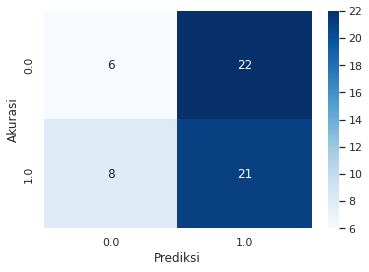

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

#calculate accuracy, precision and reall
accuracy_knn = accuracy_score(y_test, pred)
precision_knn = precision_score(y_test, pred)
recall_knn = recall_score(y_test, pred)

print('Accuracy: ',accuracy_knn)
print('Precision: ',precision_knn)
print('Recall: ',recall_knn)

Accuracy:  0.5263157894736842
Precision:  0.55
Recall:  0.3793103448275862


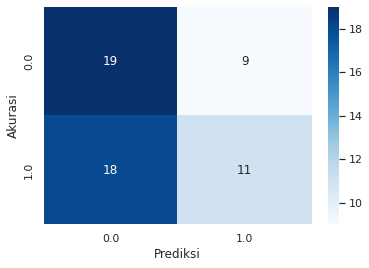

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

### SVM

In [ ]:
#Gk Bisa
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
pred=svm.predict(X_test)
#calculate accuracy, precision and reall
accuracy_svm = accuracy_score(y_test, pred)
precision_svm = precision_score(y_test, pred)
recall_svm = recall_score(y_test, pred)

print('Accuracy: ',accuracy_svm)
print('Precision: ',precision_svm)
print('Recall: ',recall_svm)

Accuracy:  0.5087719298245614
Precision:  0.6666666666666666
Recall:  0.06896551724137931


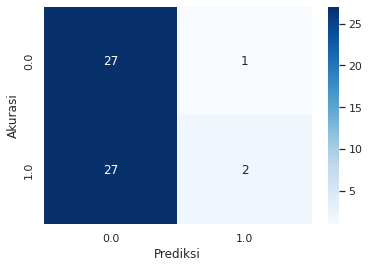

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
pred=nb.predict(X_test)

#calculate accuracy, precision and reall
accuracy_nb = accuracy_score(y_test, pred)
precision_nb = precision_score(y_test, pred)
recall_nb = recall_score(y_test, pred)

print('Accuracy: ',accuracy_nb)
print('Precision: ',precision_nb)
print('Recall: ',recall_nb)

Accuracy:  0.49122807017543857
Precision:  0.5
Recall:  0.8275862068965517


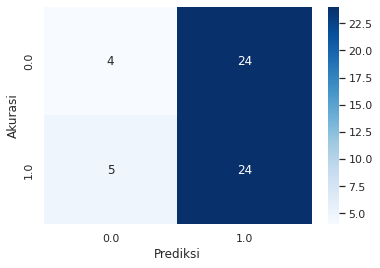

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

### Decicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

pred = dtc.predict(X_test)
#calculate accuracy, precision and reall
accuracy_dt = accuracy_score(y_test, pred)
precision_dt = precision_score(y_test, pred)
recall_dt = recall_score(y_test, pred)

print('Accuracy: ',accuracy_dt)
print('Precision: ',precision_dt)
print('Recall: ',recall_dt)

Accuracy:  0.5964912280701754
Precision:  0.6875
Recall:  0.3793103448275862


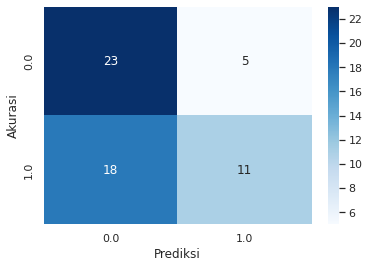

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

### Adabost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
AB = AdaBoostClassifier()
AB.fit(X_train, y_train)
pred=AB.predict(X_test)

#calculate accuracy, precision and reall
accuracy_ab = accuracy_score(y_test, pred)
precision_ab = precision_score(y_test, pred)
recall_ab = recall_score(y_test, pred)

print('Accuracy: ',accuracy_ab)
print('Precision: ',precision_ab)
print('Recall: ',recall_ab)

Accuracy:  0.5263157894736842
Precision:  0.5277777777777778
Recall:  0.6551724137931034


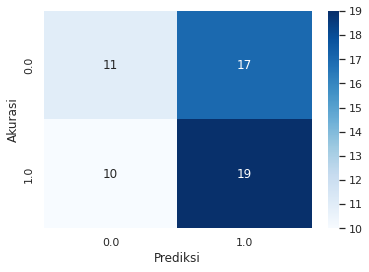

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

## Memilih Model Terbaik

Kriteria untuk kasus ini adalah model dengan nilai akurasi dan presisi tertinggi yaitu Decision Tree

In [ ]:
akurasi = [accuracy_rf, accuracy_p, accuracy_nn, accuracy_knn, accuracy_svm, accuracy_nb, accuracy_dt, accuracy_ab]
precision = [precision_rf, precision_p, precision_nn, precision_knn, precision_svm, precision_nb, precision_dt, precision_ab]
recall = [recall_rf, recall_p, recall_nn, recall_knn, recall_svm, precision_nb, recall_dt, recall_ab]
model = ['Random Forest', 'Perceptron', 'Neural Network', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree' , 'Adabost']

In [ ]:
df_model=pd.DataFrame({"Model":model,
                       "Akurasi":akurasi,
                       "Presisi":precision,
                       "Recall":recall})

df_model.sort_values(['Akurasi', 'Presisi', 'Recall'], ascending=False)

,Model,Akurasi,Presisi,Recall
6,Decision Tree,0.596491,0.687500,0.379310
3,KNN,0.526316,0.550000,0.379310
7,Adabost,0.526316,0.527778,0.655172
4,SVM,0.508772,0.666667,0.068966
1,Perceptron,0.508772,0.509434,0.931034
5,Naive Bayes,0.491228,0.500000,0.500000
2,Neural Network,0.473684,0.488372,0.724138
0,Random Forest,0.456140,0.479167,0.793103


In [ ]:
pred = Perc.predict(X_test)
#calculate accuracy, precision and reall
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)

print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)

Accuracy:  0.5087719298245614
Precision:  0.5094339622641509
Recall:  0.9310344827586207


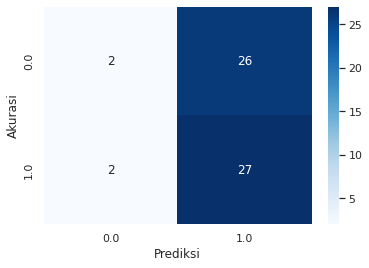

In [ ]:
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

# Menggunakan seaborn untuk CM
cm_label = pd.DataFrame(cm, columns=np.unique(y_test),
                       index=np.unique(y_test))
cm_label.index.name='Akurasi'
cm_label.columns.name='Prediksi'
sns.heatmap(cm_label, annot=True, cmap='Blues', fmt='g')

## Menyimpan Model

In [ ]:
import pickle
# save the model to disk
filename = 'model_klasifikasi_KIP.pkl'
pickle.dump(nb, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
lm = pickle.load(open(filename, 'rb'))
result = accuracy_score(pred, y_test)
print(result)

0.5087719298245614


## Uji Coba

In [ ]:
df_pilih = df_prep[['ranking_sem_4',
                    'nilai_rata2_sem_4',
                    'ranking_sem_5',
                    'nilai_rata2_sem_5',
                    'ranking_sem_6',
                    'nilai_rata2_sem_6',
                    'hutang_kpd_pihak_lain',
                    'cicilan_hutang_bulanan', 
                    'total_piutang',
                    'cicilan_piutang_dr_pihak_lain', 
                    'label'
                    ]]

In [ ]:
pilih=np.array(df_pilih.iloc[0,:-1])
pilih

array([29., 85., 28., 85., 28., 85.,  1.,  0.,  0.,  0.])

In [ ]:
pilih_label=np.array(df_pilih.iloc[0,-1])
pilih_label

array(1.)

In [ ]:
coba=np.reshape(pilih, (1, 10))
coba=pd.DataFrame(coba)
coba

,0,1,2,3,4,5,6,7,8,9
0,29.0,85.0,28.0,85.0,28.0,85.0,1.0,0.0,0.0,0.0


In [ ]:
lm.predict(coba)

array([1.])

In [ ]:
ranking_sem_4=input("Rangking Semester 4:")
nilai_rata2_sem_4=input("Nilai Rata2 Semester 4")
ranking_sem_5=input("Rangking Semester 5")
nilai_rata2_sem_5=input("Nilai Rata2 Semester 5")
ranking_sem_6=input("Rangking Semester 6")
nilai_rata2_sem_6=input("Nilai Rata2 Semester 6")
hutang_kpd_pihak_lain=input("Hutang Kepada Pihak Lain")
cicilan_hutang_bulanan= input("Hutang Bulanan")
total_piutang=input("Total Piutang ")
cicilan_piutang_dr_pihak_lain = input("Cicilan Piutang")

dict_input = {'Rangking Semester 4':ranking_sem_4,
 'Nilai Rata2 Semester 4':nilai_rata2_sem_4,
 'Rangking Semester 5':ranking_sem_5,
 'Nilai Rata2 Semester 5':nilai_rata2_sem_5,
 'Rangking Semester 6':ranking_sem_6,
 'Nilai Rata2 Semester 6':nilai_rata2_sem_6,
 'Hutang Kepada Pihak Lain':hutang_kpd_pihak_lain,
 'Hutang Bulanan':cicilan_hutang_bulanan,
 'Total Piutang':total_piutang,
 'Cicilan Piutang':cicilan_piutang_dr_pihak_lain}

Rangking Semester 4:25
Nilai Rata2 Semester 480
Rangking Semester 525
Nilai Rata2 Semester 580
Rangking Semester 628
Nilai Rata2 Semester 60
Hutang Kepada Pihak Lain20
Hutang Bulanan20
Total Piutang 20
Cicilan Piutang20


In [ ]:
X_input.shape

(1, 8)

In [ ]:
X_input = pd.DataFrame(dict_input, index=[0])

predictions = lm.predict(np.array(X_input)) 